In [3]:
import matplotlib.pyplot as plt
import numpy as np

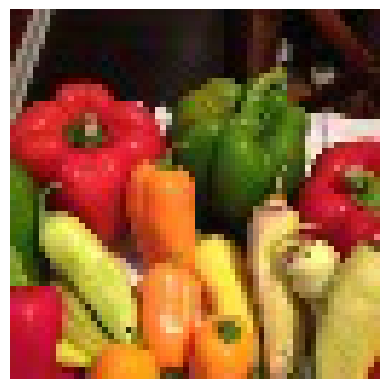

In [222]:
#mean_shift
img = plt.imread('cropped.jpg') #I use an image with low resolution for faster testing
plt.imshow(img)
plt.axis('off')
plt.show() 

In [121]:
print(img)

[[[ 42  11   9]
  [ 46   7   8]
  [ 59  17  18]
  ...
  [ 21  14   4]
  [ 29  10   3]
  [ 42  14  10]]

 [[ 43  15  12]
  [ 49  18  15]
  [ 55  21  19]
  ...
  [ 16  11   5]
  [ 32  14  12]
  [ 40  14  15]]

 [[ 45  17  13]
  [ 42  14  10]
  [ 38  11   4]
  ...
  [ 14   9   5]
  [ 31  15  18]
  [ 38  15  23]]

 ...

 [[166  18  34]
  [171  14  41]
  [172  13  45]
  ...
  [222 169  75]
  [219 144  77]
  [116  25   0]]

 [[168  14  38]
  [168  14  42]
  [168  13  45]
  ...
  [219 157  70]
  [140  54   5]
  [126  23   4]]

 [[170  13  44]
  [170  13  42]
  [168  13  45]
  ...
  [208 142  58]
  [120  28   0]
  [135  26  21]]]


In [122]:
print(img.shape)

(64, 64, 3)


In [123]:
X = img.copy().reshape((img.shape[0]*img.shape[1], img.shape[2]))
X = X.astype('int64')

# X.reshape((img.shape[0],img.shape[1], img.shape[2]))

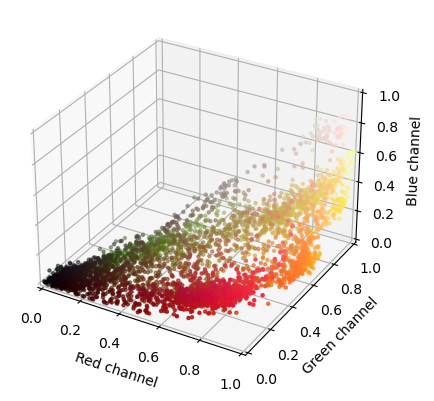

In [124]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
normalized_X = X/255

# Plot the pixel data in 3D space
ax.scatter(normalized_X[:, 0], normalized_X[:, 1], normalized_X[:, 2], s=5, c=normalized_X)

# Set axis labels and limits
ax.set_xlabel('Red channel')
ax.set_ylabel('Green channel')
ax.set_zlabel('Blue channel')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])

plt.show()


[[[ 23  13   8]
  [ 23  13   8]
  [ 23  13   8]
  ...
  [ 23  13   8]
  [ 23  13   8]
  [ 23  13   8]]

 [[ 23  13   8]
  [ 23  13   8]
  [ 23  13   8]
  ...
  [ 23  13   8]
  [ 23  13   8]
  [ 23  13   8]]

 [[ 23  13   8]
  [ 23  13   8]
  [ 23  13   8]
  ...
  [ 23  13   8]
  [ 23  13   8]
  [ 23  13   8]]

 ...

 [[171  16  40]
  [171  16  40]
  [171  16  40]
  ...
  [202 179  75]
  [215 147  68]
  [ 94  16   5]]

 [[171  16  40]
  [171  16  40]
  [171  16  40]
  ...
  [212 144  48]
  [128  71   5]
  [135  19  18]]

 [[171  16  40]
  [171  16  40]
  [171  16  40]
  ...
  [199 123  55]
  [136  19  18]
  [136  19  18]]]


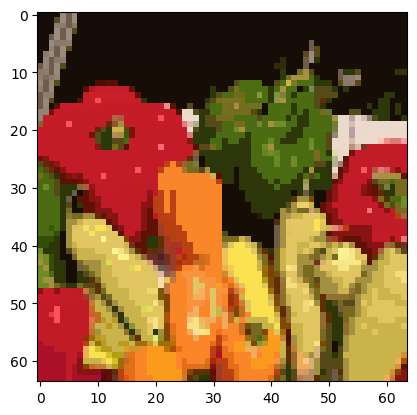

In [126]:
R = 21

def mean_shift(center):
    window = [point for point in X if (center[0]-point[0])**2+(center[1]-point[1])**2+(center[2]-point[2])**2<=R**2]
    window = np.array(window)
    center = np.average(window, axis=0)
    next_window = [point for point in X if (center[0]-point[0])**2+(center[1]-point[1])**2+(center[2]-point[2])**2<=R**2]
    next_window = np.array(next_window)
    if np.sum(window) == np.sum(next_window):
        return center   
    else: center = mean_shift(center)
    return center

for i in range(len(X)):
    center = X[i]
    # window = [point for point in X if (center[0]-point[0])**2+(center[1]-point[1])**2+(center[2]-point[2])**2<=R**2]
    # window = np.array(window)
    # center = np.average(window)
    # X[i] = center
    X[i] = mean_shift(center)
X = X.reshape((img.shape[0],img.shape[1],img.shape[2]))
print(X)
plt.imshow(X)

Testing with multiple window size:
https://colab.research.google.com/drive/1cKwnwt97vBpjQIrGR6A5tyAO5QJk7r9s?usp=sharing

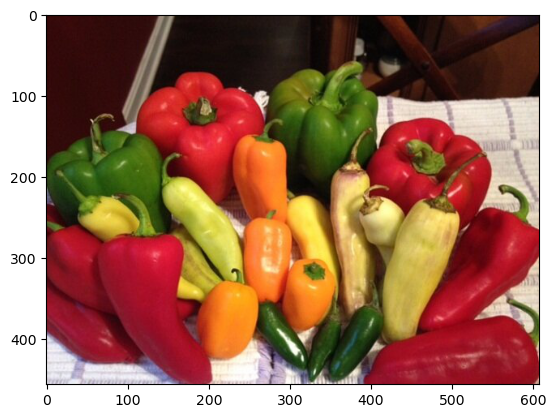

array([[ 50,  10,   8],
       [ 50,  10,   8],
       [ 50,  10,   8],
       ...,
       [206, 164, 148],
       [173, 142, 122],
       [176, 149, 128]], dtype=uint8)

In [184]:
#Test and compare with KMeans

from sklearn.cluster import KMeans
img = plt.imread('pepper.jpg')
X = img.reshape((img.shape[0]*img.shape[1], img.shape[2]))
plt.imshow(img)
plt.show()
X


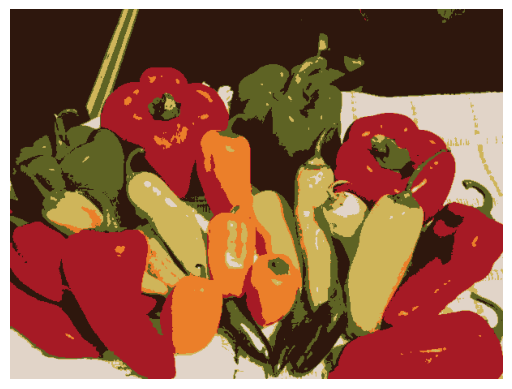

In [191]:
K = 6
kmeans = KMeans(n_clusters=K).fit(X)
label = kmeans.predict(X)

img4 = np.zeros_like(X)

for k in range(K):
    img4[label == k] = kmeans.cluster_centers_[k]

img5 = img4.reshape((img.shape[0], img.shape[1], img.shape[2]))
plt.imshow(img5)
plt.axis('off')
plt.show()

In [178]:
feature_vectors = []
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        pixel = img[i,j]
        feature_vector = [pixel[0], pixel[1], pixel[2], i, j]
        feature_vectors.append(feature_vector)
feature_vectors = np.array(feature_vectors)
print(feature_vectors)

[[ 50  10   8   0   0]
 [ 50  10   8   0   1]
 [ 50  10   8   0   2]
 ...
 [206 164 148 455 605]
 [173 142 122 455 606]
 [176 149 128 455 607]]


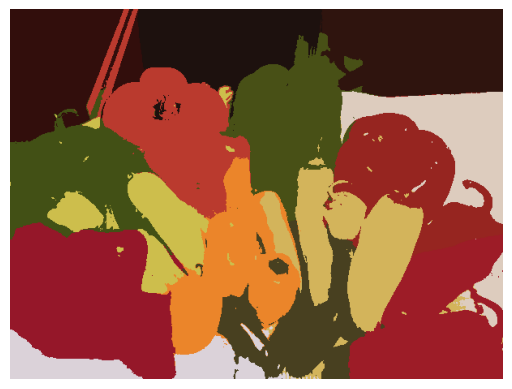

In [194]:
K = 15
kmeans = KMeans(n_clusters=K).fit(feature_vectors)
label = kmeans.predict(feature_vectors)

img4 = np.zeros_like(X)
for k in range(K):
    img4[label == k] = kmeans.cluster_centers_[k][:3]

img5 = img4.reshape((img.shape[0], img.shape[1], img.shape[2]))
plt.imshow(img5)
plt.axis('off')
plt.show()